# Phase 5: Visualize Complete Registration Results

This notebook provides comprehensive visualization of the complete 4-phase OCT registration pipeline.

## What this shows:
- Before/after vessel alignment
- Before/after surface alignment
- 3D transformation parameters
- Quality metrics and confidence scores
- **Interactive 3D merged volume visualization**

## Setup and Load Data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Setup
data_dir = Path('data')
plt.rcParams['figure.figsize'] = (15, 10)

print("✓ Imports complete")

✓ Imports complete


In [10]:
# Load all registration data
print("Loading registration results...")

# Phase 1: Surfaces
surface_v0 = np.load(data_dir / 'surface_peaks_volume0.npy')
surface_v1 = np.load(data_dir / 'surface_peaks_volume1.npy')
surface_v1_aligned = np.load(data_dir / 'surface_v1_fully_aligned.npy')

# Phase 2: Vessels
skeleton_v0 = np.load(data_dir / 'vessel_skeleton_volume0.npy')
skeleton_v1 = np.load(data_dir / 'vessel_skeleton_volume1.npy')
skeleton_v1_aligned = np.load(data_dir / 'skeleton_v1_aligned.npy')

bifurcations_v0 = np.load(data_dir / 'bifurcation_coords_volume0.npy')
bifurcations_v1 = np.load(data_dir / 'bifurcation_coords_volume1.npy')
bifurcations_v1_aligned = np.load(data_dir / 'bifurcations_v1_aligned.npy')

# Phase 3 & 4: Registration parameters
xy_params = np.load(data_dir / 'xy_registration_params.npy', allow_pickle=True).item()
registration_3d = np.load(data_dir / 'registration_3d_params.npy', allow_pickle=True).item()

print(f"✓ Loaded all data")
print(f"\nData shapes:")
print(f"  Surfaces: {surface_v0.shape}")
print(f"  Vessels: {skeleton_v0.shape}")
print(f"  Bifurcations V0: {len(bifurcations_v0)}")
print(f"  Bifurcations V1: {len(bifurcations_v1)}")

Loading registration results...
✓ Loaded all data

Data shapes:
  Surfaces: (1536, 360)
  Vessels: (1216, 1216)
  Bifurcations V0: 2094
  Bifurcations V1: 5539


## 1. Display Registration Parameters

In [11]:
print("=" * 70)
print("3D REGISTRATION PARAMETERS")
print("=" * 70)
print()
print("📍 XY Registration (Phase 3):")
print(f"   Translation (dy, dx): ({registration_3d['translation_xy'][0]:.2f}, {registration_3d['translation_xy'][1]:.2f}) pixels")
print(f"   Inlier ratio: {registration_3d['xy_inlier_ratio']:.2%}")
print(f"   Improvement: {registration_3d['xy_improvement']*100:.1f}%")
print()
print("📏 Depth Alignment (Phase 4):")
print(f"   Method used: {registration_3d['depth_method_used']}")
print(f"   Depth offset: {registration_3d['depth_offset_final']:.2f} pixels")
print(f"   Confidence: {registration_3d['depth_confidence_final']:.2%}")
print()
print("🎯 FINAL 3D TRANSFORM:")
transform = registration_3d['transform_3d']
print(f"   X translation (lateral): {transform['dx']:.2f} pixels")
print(f"   Y translation (depth):   {transform['dy']:.2f} pixels")
print(f"   Z translation (B-scan):  {transform['dz']:.2f} pixels")
print("=" * 70)

3D REGISTRATION PARAMETERS

📍 XY Registration (Phase 3):
   Translation (dy, dx): (0.00, 0.00) pixels
   Inlier ratio: 33.51%
   Improvement: 0.0%

📏 Depth Alignment (Phase 4):
   Method used: Correlation (Method B)
   Depth offset: 75.00 pixels
   Confidence: 100.00%

🎯 FINAL 3D TRANSFORM:
   X translation (lateral): 0.00 pixels
   Y translation (depth):   75.00 pixels
   Z translation (B-scan):  0.00 pixels


## 2. Vessel Skeleton Alignment

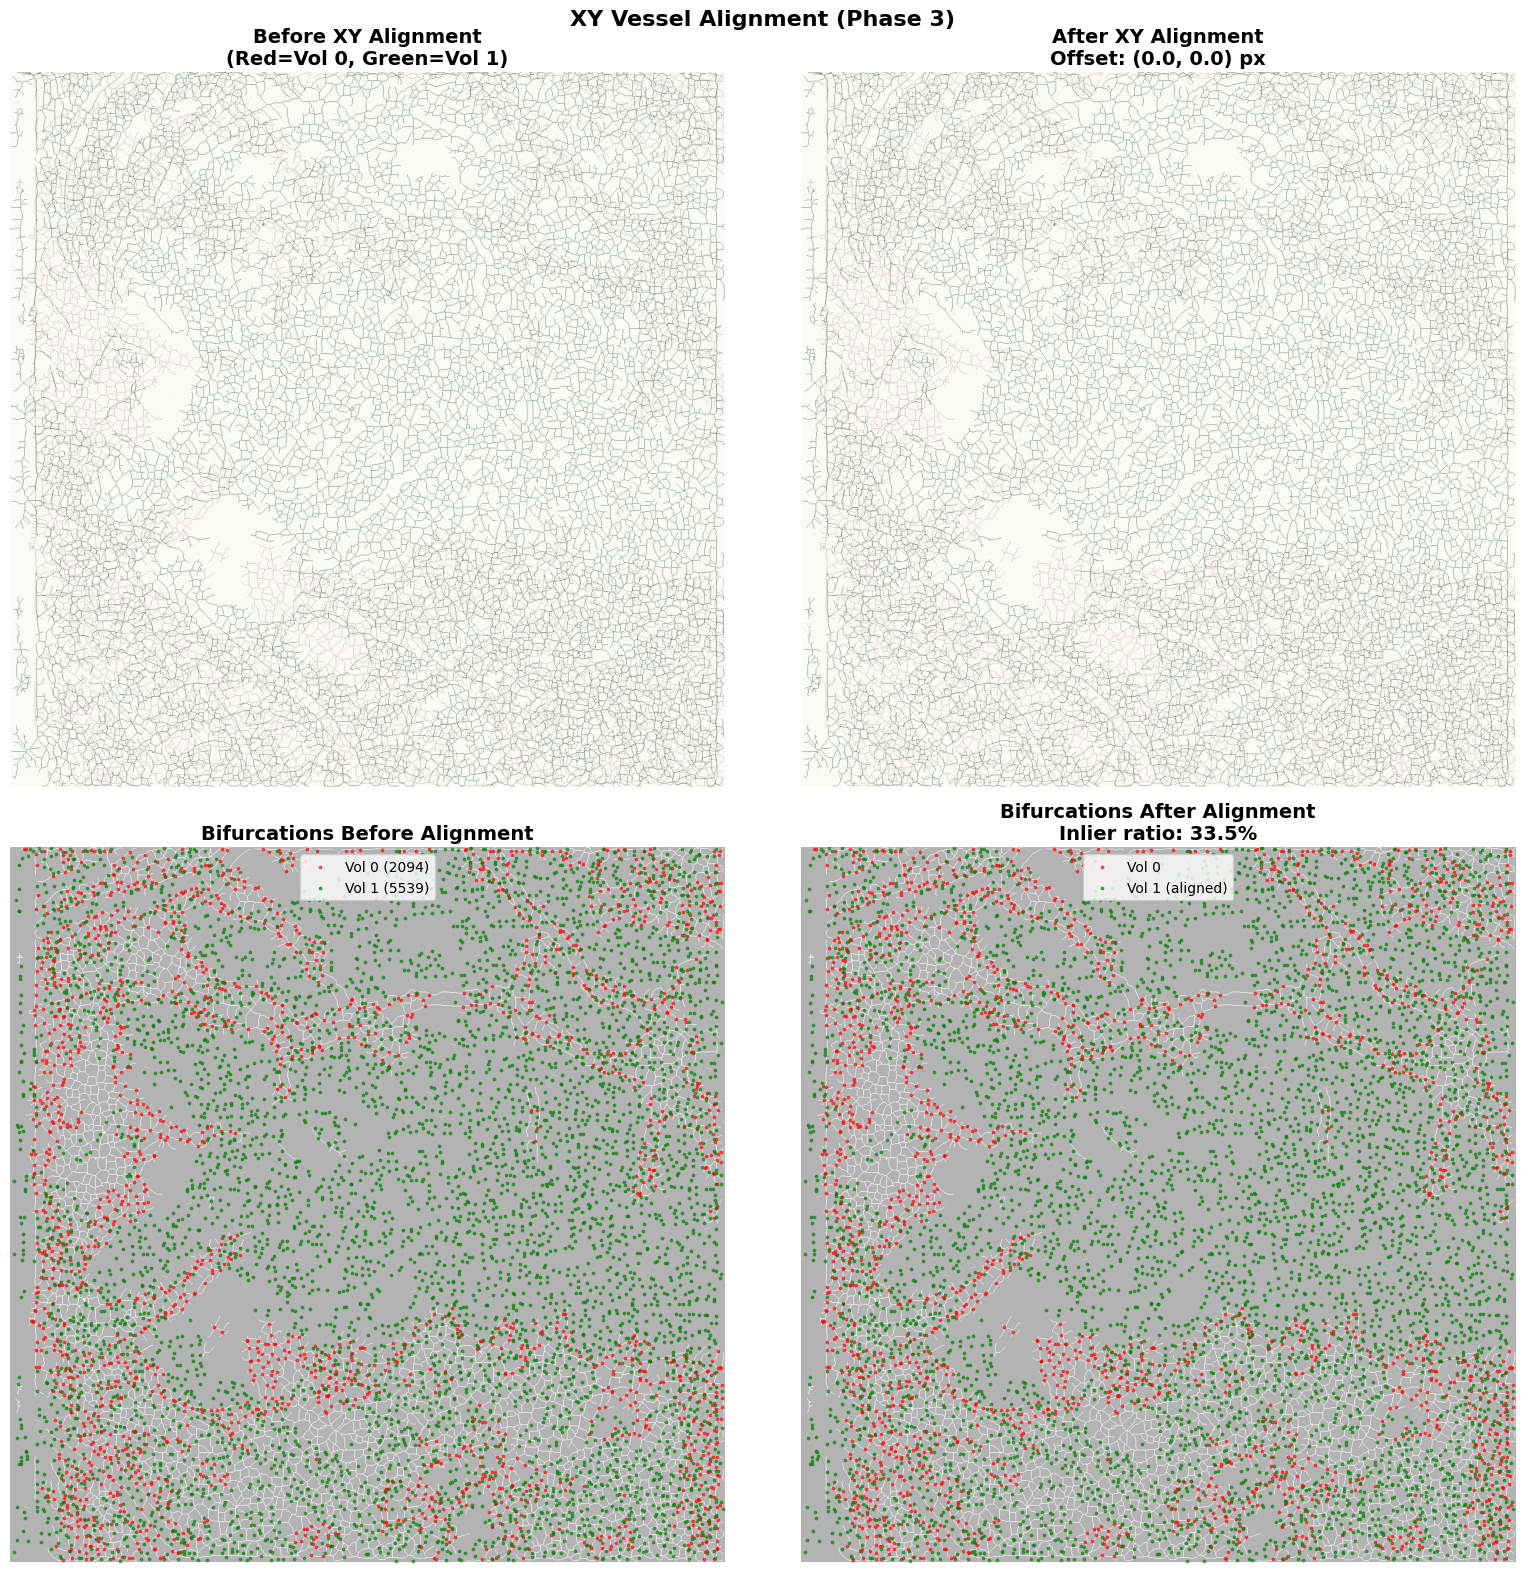

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Before alignment
axes[0, 0].imshow(skeleton_v0, cmap='Reds', alpha=0.5)
axes[0, 0].imshow(skeleton_v1, cmap='Greens', alpha=0.5)
axes[0, 0].set_title('Before XY Alignment\n(Red=Vol 0, Green=Vol 1)', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# After alignment
axes[0, 1].imshow(skeleton_v0, cmap='Reds', alpha=0.5)
axes[0, 1].imshow(skeleton_v1_aligned, cmap='Greens', alpha=0.5)
axes[0, 1].set_title(f'After XY Alignment\nOffset: ({registration_3d["translation_xy"][0]:.1f}, {registration_3d["translation_xy"][1]:.1f}) px', 
                    fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# Bifurcations before
axes[1, 0].imshow(skeleton_v0, cmap='gray', alpha=0.3)
axes[1, 0].scatter(bifurcations_v0[:, 1], bifurcations_v0[:, 0], c='red', s=3, alpha=0.6, label=f'Vol 0 ({len(bifurcations_v0)})')
axes[1, 0].scatter(bifurcations_v1[:, 1], bifurcations_v1[:, 0], c='green', s=3, alpha=0.6, label=f'Vol 1 ({len(bifurcations_v1)})')
axes[1, 0].set_title('Bifurcations Before Alignment', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].axis('off')

# Bifurcations after
axes[1, 1].imshow(skeleton_v0, cmap='gray', alpha=0.3)
axes[1, 1].scatter(bifurcations_v0[:, 1], bifurcations_v0[:, 0], c='red', s=3, alpha=0.6, label=f'Vol 0')
axes[1, 1].scatter(bifurcations_v1_aligned[:, 1], bifurcations_v1_aligned[:, 0], c='green', s=3, alpha=0.6, label=f'Vol 1 (aligned)')
axes[1, 1].set_title(f'Bifurcations After Alignment\nInlier ratio: {registration_3d["xy_inlier_ratio"]:.1%}', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].axis('off')

plt.suptitle('XY Vessel Alignment (Phase 3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. 3D Merged Volume Visualization

Load full 3D OCT volumes, apply transformation, merge them, and visualize in interactive 3D.

In [ ]:
import sys
sys.path.append('../src')
from oct_volumetric_viewer import OCTImageProcessor, OCTVolumeLoader, OCTVolumetricViewer
from scipy.ndimage import shift as nd_shift
import pyvista as pv

print("Loading full 3D OCT volumes...")
print("This may take 1-2 minutes...")

# Initialize loader
processor = OCTImageProcessor(sidebar_width=250, crop_top=50)
loader = OCTVolumeLoader(processor)

# Find volume directories containing BMP files (recursively search)
oct_data_dir = Path('../oct_data')

# Find all directories with BMP files
bmp_dirs = []
for bmp_file in oct_data_dir.rglob('*.bmp'):
    vol_dir = bmp_file.parent
    if vol_dir not in bmp_dirs:
        bmp_dirs.append(vol_dir)

# Sort to get consistent ordering
all_volume_dirs = sorted(bmp_dirs)

print(f"\nFound {len(all_volume_dirs)} volume directories with BMP files")

# Use the old F001 data (same as used in notebooks 1-4)
f001_vols = [v for v in all_volume_dirs if 'F001_IP' in str(v)]

if len(f001_vols) >= 2:
    print(f"\nUsing F001 data (same as notebooks 1-4):")
    print(f"  Volume 0: {f001_vols[0].name}")
    print(f"  Volume 1: {f001_vols[1].name}")
    volume_dirs_to_use = f001_vols[:2]
else:
    print(f"\nWarning: F001 data not found, using first 2 available volumes")
    volume_dirs_to_use = all_volume_dirs[:2]

# Load volumes
print("\nLoading volume 0...")
volume_0 = loader.load_volume_from_directory(str(volume_dirs_to_use[0]))

print("Loading volume 1...")
volume_1 = loader.load_volume_from_directory(str(volume_dirs_to_use[1]))

if volume_0 is None or volume_1 is None:
    print("\n❌ ERROR: Failed to load volumes!")
    print("Make sure the directories contain BMP files.")
else:
    print(f"\n✓ Loaded volumes:")
    print(f"  Volume 0: {volume_0.shape}")
    print(f"  Volume 1: {volume_1.shape}")

In [ ]:
# Apply 3D transformation to volume 1
print("Applying 3D transformation to volume 1...")

transform = registration_3d['transform_3d']
print(f"\nTransformation:")
print(f"  X (lateral): {transform['dx']:.2f} pixels")
print(f"  Y (depth):   {transform['dy']:.2f} pixels")
print(f"  Z (B-scan):  {transform['dz']:.2f} pixels")

# Apply shift to volume 1
# Note: scipy.ndimage.shift uses (y, x, z) order
shift_vector = (transform['dy'], transform['dx'], transform['dz'])
volume_1_aligned = nd_shift(volume_1, shift=shift_vector, order=1, mode='constant', cval=0)

print(f"\n✓ Volume 1 aligned: {volume_1_aligned.shape}")

In [ ]:
# Create merged volume (average in overlap regions)
print("Creating merged volume...")

# Simple alpha blending (50/50)
merged_volume = np.zeros_like(volume_0)

# Where both volumes have data, average them
mask_0 = volume_0 > 0
mask_1 = volume_1_aligned > 0
overlap = mask_0 & mask_1

# Only volume 0
merged_volume[mask_0 & ~mask_1] = volume_0[mask_0 & ~mask_1]

# Only volume 1
merged_volume[~mask_0 & mask_1] = volume_1_aligned[~mask_0 & mask_1]

# Overlap region - blend 50/50
merged_volume[overlap] = 0.5 * volume_0[overlap] + 0.5 * volume_1_aligned[overlap]

print(f"✓ Merged volume: {merged_volume.shape}")
print(f"\nMerge statistics:")
print(f"  Only Vol 0:  {(mask_0 & ~mask_1).sum():,} voxels")
print(f"  Only Vol 1:  {(~mask_0 & mask_1).sum():,} voxels")
print(f"  Overlap:     {overlap.sum():,} voxels ({100*overlap.sum()/overlap.size:.2f}%)")

In [ ]:
# Visualize merged volume in 3D using PyVista
print("Creating 3D visualization...")
print("This will open an interactive 3D window.")
print("Controls:")
print("  - Left click + drag: Rotate")
print("  - Scroll: Zoom")
print("  - Right click + drag: Pan")
print("  - 'q': Close window")

# Create viewer for merged volume
viewer = OCTVolumetricViewer(merged_volume, scan_area_mm=6.0)

# Render volume
viewer.render_volume(opacity_transfer='sigmoid', cmap='hot')

In [ ]:
# Alternative: Side-by-side comparison
print("Creating side-by-side comparison...")

# Create plotter with 3 viewports
plotter = pv.Plotter(shape=(1, 3))

# Create grids
viewer_0 = OCTVolumetricViewer(volume_0, scan_area_mm=6.0)
viewer_1 = OCTVolumetricViewer(volume_1_aligned, scan_area_mm=6.0)
viewer_merged = OCTVolumetricViewer(merged_volume, scan_area_mm=6.0)

grid_0 = viewer_0.create_vtk_volume()
grid_1 = viewer_1.create_vtk_volume()
grid_merged = viewer_merged.create_vtk_volume()

# Volume 0
plotter.subplot(0, 0)
plotter.add_volume(grid_0, scalars='intensity', cmap='hot', opacity='sigmoid', show_scalar_bar=False)
plotter.add_text('Volume 0\n(Reference)', font_size=12)

# Volume 1 (aligned)
plotter.subplot(0, 1)
plotter.add_volume(grid_1, scalars='intensity', cmap='hot', opacity='sigmoid', show_scalar_bar=False)
plotter.add_text(f'Volume 1\n(Aligned, Y+{transform["dy"]:.0f}px)', font_size=12)

# Merged
plotter.subplot(0, 2)
plotter.add_volume(grid_merged, scalars='intensity', cmap='hot', opacity='sigmoid', show_scalar_bar=True)
plotter.add_text('Merged Volume\n(50/50 blend)', font_size=12)

plotter.link_views()
plotter.show()

In [ ]:
# Optional: Export merged volume for further analysis
print("\nOptional: Save merged volume")
print("Uncomment to save:")
print()
print("# Save as numpy array:")
print("# np.savez_compressed('data/merged_volume.npz', volume=merged_volume)")
print()
print("# Save as VTK format:")
print("# viewer_merged.export_vtk('data/merged_volume.vtk')")
print()
print("\n✅ 3D Visualization Complete!")